In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['airbnb-open-data-in-nyc', 'pos-neg', 'airbnbmiddle']


In [19]:
import numpy as np
import pandas as pd

In [20]:
dataset = pd.read_csv('../input/airbnb-open-data-in-nyc/reviews_detail.csv')

In [21]:
print(dataset.head())
dataset.info()

   listing_id                        ...                                                                   comments
0     9452127                        ...                          Great place. Helena was prompt to reply and ve...
1     9452127                        ...                          We had previously stayed at the apartment over...
2     9452127                        ...                          Helena was a great host and extremely accommod...
3     9452127                        ...                          Helena was extremely accessible throughout the...
4     9452127                        ...                          Awesome place! Looks just as in photos. Plenty...

[5 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801784 entries, 0 to 801783
Data columns (total 6 columns):
listing_id       801784 non-null int64
id               801784 non-null int64
date             801784 non-null object
reviewer_id      801784 non-null int64
reviewer_name  

In [22]:
dataset=dataset.dropna()

In [23]:
dataset=dataset.drop(['id','reviewer_name','date','comments'],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800995 entries, 0 to 801783
Data columns (total 2 columns):
listing_id     800995 non-null int64
reviewer_id    800995 non-null int64
dtypes: int64(2)
memory usage: 18.3 MB


In [24]:
pos_neg_data1 = pd.read_csv('../input/pos-neg/generated_rating.csv')
pos_neg_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
Positive    100000 non-null float64
Negative    100000 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


In [25]:
pos_neg_data2 = pd.read_csv('../input/airbnbmiddle/generated_rating3.csv')
pos_neg_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
Positive    100000 non-null float64
Negative    100000 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


In [26]:
pos_neg_data3 = pd.read_csv('../input/pos-neg/generated_rating2.csv')
pos_neg_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600995 entries, 0 to 600994
Data columns (total 2 columns):
Positive    600995 non-null float64
Negative    600995 non-null float64
dtypes: float64(2)
memory usage: 9.2 MB


In [27]:
print(pos_neg_data1.head())
print(pos_neg_data2.head())

   Positive  Negative
0      30.3       0.0
1      17.0       6.0
2      31.2       0.0
3      11.3       0.0
4      34.0       0.0
   Positive  Negative
0      48.1       0.0
1      23.3       0.0
2      45.3       0.0
3      35.1       0.0
4      60.4       0.0


In [28]:
frames = [pos_neg_data1, pos_neg_data2,pos_neg_data3]

input_dataset = pd.concat(frames,ignore_index=True)
input_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800995 entries, 0 to 800994
Data columns (total 2 columns):
Positive    800995 non-null float64
Negative    800995 non-null float64
dtypes: float64(2)
memory usage: 12.2 MB


In [29]:
input_dataset.head()

,Positive,Negative
0,30.3,0.0
1,17.0,6.0
2,31.2,0.0
3,11.3,0.0
4,34.0,0.0


In [30]:
dataset.reset_index(drop=True,inplace=True)
dataset.info()
input_dataset.reset_index(drop=True,inplace=True)
input_dataset.info()
rating_input_data =pd.concat([dataset, input_dataset], axis=1)
rating_input_data.head()
rating_input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800995 entries, 0 to 800994
Data columns (total 2 columns):
listing_id     800995 non-null int64
reviewer_id    800995 non-null int64
dtypes: int64(2)
memory usage: 12.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800995 entries, 0 to 800994
Data columns (total 2 columns):
Positive    800995 non-null float64
Negative    800995 non-null float64
dtypes: float64(2)
memory usage: 12.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800995 entries, 0 to 800994
Data columns (total 4 columns):
listing_id     800995 non-null int64
reviewer_id    800995 non-null int64
Positive       800995 non-null float64
Negative       800995 non-null float64
dtypes: float64(2), int64(2)
memory usage: 24.4 MB


In [31]:
print(rating_input_data.head(20))

    listing_id  reviewer_id  Positive  Negative
0      9452127      6279455      30.3       0.0
1      9452127     23770684      17.0       6.0
2      9452127     29070567      31.2       0.0
3      9452127     58381183      11.3       0.0
4      9452127     29014080      34.0       0.0
5      9452127     62596970      47.1       0.0
6      9452127     64288274      22.2       2.9
7      9452127     59071346      17.4       0.8
8      9452127     64934661      34.0       0.0
9      9452127     10147136      21.6       0.0
10     9452127     36661817      29.1       2.7
11     9452127     44774424      22.9       4.8
12     9452127     62342928      24.3       0.0
13     9452127     35911325      33.9       0.0
14     9452127     70298951      29.1       1.6
15     9452127     21288203      33.3       0.0
16     9452127    124270928      17.2      11.7
17     9452127      5917300      16.5       0.0
18     9452127     56075148      66.4       0.0
19     9452127     16624155      51.8   

Polarity scores leass than 5 are not considered in graph below as they are very low negative scores and most of the data has polarity score less than 5
**Distribution of data for negative polarity score**

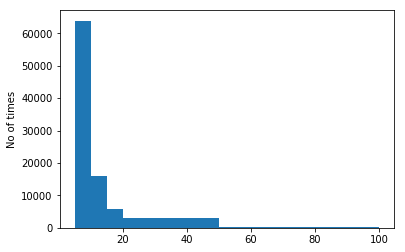

In [33]:
import matplotlib.pyplot as plt
#ignored values between 0 to 1 as it is negligible negative component
plt.hist(rating_input_data['Negative'],bins=[5,10,15,20,25,50,100])
plt.ylabel('No of times')
plt.show()

**Distribution of data for positive polarity score**

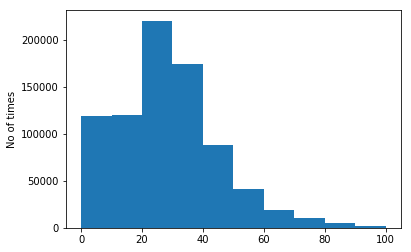

In [34]:
plt.hist(rating_input_data['Positive'],bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.ylabel('No of times')
plt.show()

**Algorithm to compute the rating as per polarity score distribution and review comment analysis **

In [35]:
def compute_rating(pos,neg):
    rating = 0
    if pos > 30:
        rating =5
    elif pos >20:
        rating =4
    elif pos >10:
        rating =3
    elif pos >0:
        rating =2
        
    penalty=0
    if neg>5 and neg<=20:
        penalty=1
    elif neg>20 and neg<=100:
        penalty=2
    
    rating= rating-penalty
    if rating<0:
        rating=0
    return rating


In [36]:
def predict_rating(df):
    rating_array = []
    for index, row in df.iterrows():
        rating=compute_rating(row['Positive'],row['Negative'])
        rating_array.append(rating)
    return rating_array


In [37]:
rating_array =predict_rating(rating_input_data)

In [38]:
print(len(rating_array))
rating_array=np.array(rating_array)

800995


In [39]:
output_df = pd.DataFrame({
    'listing_id':rating_input_data['listing_id'],
    'reviewer_id':rating_input_data['reviewer_id'],
    'rating':rating_array[0:800995], 
})

**Predicted Rating**

In [40]:

output_df.to_csv('rating_prediction_full.csv',index=False)
output_df.head()

,listing_id,reviewer_id,rating
0,9452127,6279455,5
1,9452127,23770684,2
2,9452127,29070567,5
3,9452127,58381183,3
4,9452127,29014080,5
